In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn
import pandas as pd
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (12., 12.0)

Download Txt GRID DATA
http://services.swpc.noaa.gov/text/aurora-nowcast-map.txt

In [2]:
ls Data/

aurora-nowcast-map.txt  BIKF-NZAA.csv


In [3]:
aurora=np.loadtxt('Data/aurora-nowcast-map.txt')

In [7]:
flight=np.loadtxt('Data/BIKF-NZAA.csv',delimiter=',',dtype=str)
lat=flight[:,3].astype(float)
lon=flight[:,4].astype(float)

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


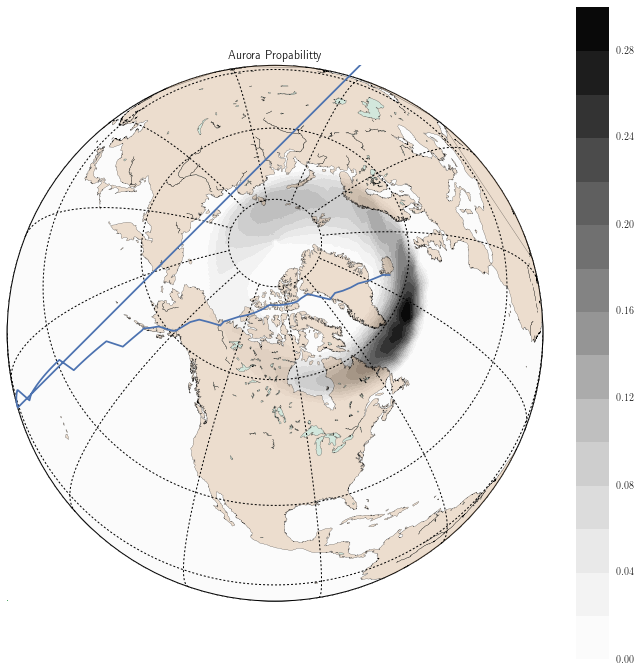

In [8]:
m = Basemap(projection='ortho',lat_0=70,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.2)
#m.drawcountries(linewidth=0.2)
m.fillcontinents(color='#cc9966',lake_color='#99ffff',alpha=0.3)
# draw the edge of the map projection region (the projection limb)
m.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 512
nlons = 1024
delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])

# compute native map projection coordinates of lat/lon grid.
x, y = m(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = m.contourf(x,y,aurora/100.,15,linewidths=1.5)
m.plot(lon,lat,latlon=True)
fl=m.plot(lat,lon,)
plt.colorbar(cs)
plt.title('Aurora Propabilitty')
plt.show()

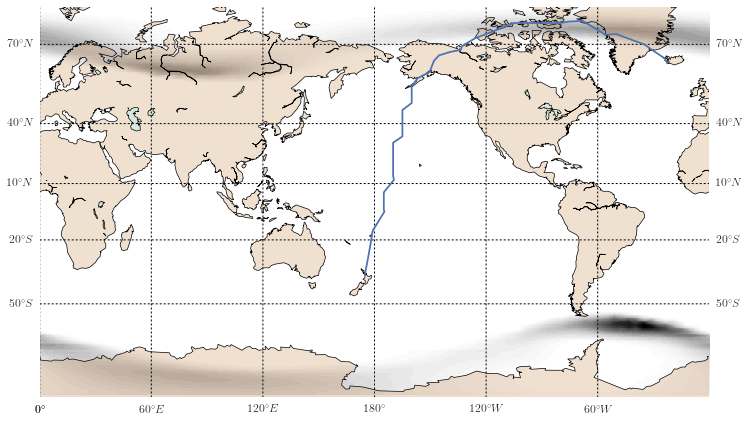

In [9]:
nlats = 512
nlons = 1024
lats=np.linspace(-90,90,nlats)
lons=np.linspace(0,360,nlons)
#m = Basemap(projection='ortho',lat_0=70,lon_0=-100,resolution='l')
m=Basemap(llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80,projection='mill')
m.drawcoastlines(linewidth=0.7)
m.fillcontinents(color='#cc9966',lake_color='#99ffff',alpha=0.3)
m.drawparallels(np.arange(-80,81,30),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])
#m.contourf(lats,lons,aurora)
m.imshow(aurora)
m.plot(lon,lat,latlon=True)

In [10]:
X,Y=np.meshgrid(lons,lats)

In [15]:
X

array([[  0.00000000e+00,   3.51906158e-01,   7.03812317e-01, ...,
          3.59296188e+02,   3.59648094e+02,   3.60000000e+02],
       [  0.00000000e+00,   3.51906158e-01,   7.03812317e-01, ...,
          3.59296188e+02,   3.59648094e+02,   3.60000000e+02],
       [  0.00000000e+00,   3.51906158e-01,   7.03812317e-01, ...,
          3.59296188e+02,   3.59648094e+02,   3.60000000e+02],
       ..., 
       [  0.00000000e+00,   3.51906158e-01,   7.03812317e-01, ...,
          3.59296188e+02,   3.59648094e+02,   3.60000000e+02],
       [  0.00000000e+00,   3.51906158e-01,   7.03812317e-01, ...,
          3.59296188e+02,   3.59648094e+02,   3.60000000e+02],
       [  0.00000000e+00,   3.51906158e-01,   7.03812317e-01, ...,
          3.59296188e+02,   3.59648094e+02,   3.60000000e+02]])

In [12]:
from scipy.interpolate import griddata,interp2d,RectBivariateSpline,RegularGridInterpolator
f = griddata((lons,lats), aurora,(X,Y))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [163]:
lons[0]

array([  0.00000000e+00,   6.14192112e-03,   1.22838422e-02, ...,
         6.27090146e+00,   6.27704339e+00,   6.28318531e+00])